In [6]:
from deepnets.system import Shastry_Sutherland
from deepnets.net import ConvNext
import jax
import jax.numpy as jnp
import numpy as np
from flax import linen as nn

In [7]:
L = 8
J = [0.8,1]
system = Shastry_Sutherland(L = L, J = J)
n_blocks = (1,)
features = (12,)
expansion_factor = 2
net_type = "NoPatching"
kernel_width = 3
downsample_factor = 2
final_features = features[-1]
init_kernel_width = 6
net = ConvNext(n_blocks, features, expansion_factor, net_type, kernel_width, downsample_factor, final_features, init_kernel_width, system)

Using net_type= NoPatching


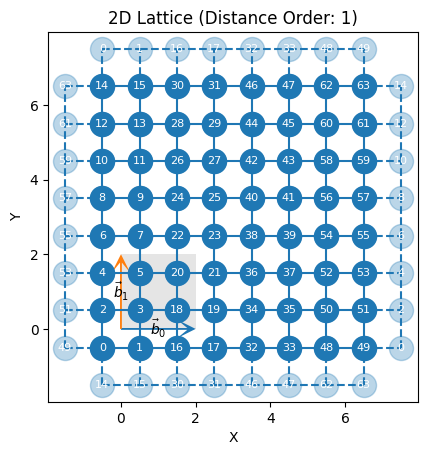

<Axes: title={'center': '2D Lattice (Distance Order: 1)'}, xlabel='X', ylabel='Y'>

In [8]:
system.graph.draw()

In [9]:
sample = jnp.ones((1,L**2))
vars = net.network.init(jax.random.PRNGKey(0),sample)
translation_group = system.graph.translation_group() #correct translation group for S

(1, 64)
(1, 8, 8, 12)
(1, 8, 8, 12)
(1,)


In [10]:
#Check translational symmetry
sample = system.hilbert_space.random_state(jax.random.PRNGKey(5))
translated_samples = translation_group@sample
log_psis = net.network.apply(vars,translated_samples)
print(log_psis)

(16, 64)
(16, 8, 8, 12)
(16, 8, 8, 12)
(16,)
[2.19192621-0.27547055j 2.19192621-0.27547055j 2.19192621-0.27547055j
 2.19192621-0.27547055j 2.19192621-0.27547055j 2.19192621-0.27547055j
 2.19192621-0.27547055j 2.19192621-0.27547055j 2.19192621-0.27547055j
 2.19192621-0.27547055j 2.19192621-0.27547055j 2.19192621-0.27547055j
 2.19192621-0.27547055j 2.19192621-0.27547055j 2.19192621-0.27547055j
 2.19192621-0.27547055j]


In [17]:
sample = system.hilbert_space.random_state(jax.random.PRNGKey(5),size = 5)

In [19]:
sample.shape

(5, 64)

In [11]:
assert np.all(np.isclose(log_psis[0],log_psis))

In [12]:
log_psis

Array([2.19192621-0.27547055j, 2.19192621-0.27547055j,
       2.19192621-0.27547055j, 2.19192621-0.27547055j,
       2.19192621-0.27547055j, 2.19192621-0.27547055j,
       2.19192621-0.27547055j, 2.19192621-0.27547055j,
       2.19192621-0.27547055j, 2.19192621-0.27547055j,
       2.19192621-0.27547055j, 2.19192621-0.27547055j,
       2.19192621-0.27547055j, 2.19192621-0.27547055j,
       2.19192621-0.27547055j, 2.19192621-0.27547055j], dtype=complex128)

In [34]:
translation_group

PermutationGroup(elems=[Id(), Translation([0, 1]), Translation([0, 2]), Translation([1, 0]), Translation([1, 1]), Translation([1, 2]), Translation([2, 0]), Translation([2, 1]), Translation([2, 2])], degree=36)

In [4]:
sample.shape

(1, 36)

In [142]:
x = np.arange(L**2)
x = x.reshape((1,L**2))

In [143]:
x = system.extract_patches_as2d(x,2,(L,L))
x = x.reshape((1,3,3,2,2))

In [144]:
x.shape

(1, 3, 3, 2, 2)

In [145]:
x[0,1,1,0,1]

17

In [146]:
import einops

In [147]:
y = einops.rearrange(x,"batch ax ay by bx -> batch (ax bx) (ay by)")

In [148]:
y= y.reshape(y.shape+(1,))

In [149]:
y.shape

(1, 6, 6, 1)

In [150]:
class TestConv(nn.Module):
    kernel_size: tuple
    n_features: int

    @nn.compact
    def __call__(self,x_input):
        convolution = nn.Conv(
                    self.n_features,
                    self.kernel_size,
                    padding="CIRCULAR"
                )
        return convolution(x_input)

In [151]:
conv = TestConv(kernel_size = (6,6),n_features = 12)

In [152]:
vars = conv.init(jax.random.PRNGKey(0),y)


In [153]:
vars['params']['Conv_0']['kernel'][:,:,0,4]

Array([[ 0.04504262,  0.20787294,  0.35287154, -0.0545278 , -0.1332887 ,
        -0.04158057],
       [ 0.29499847, -0.22489384,  0.29266974, -0.24499482, -0.03102102,
        -0.1031431 ],
       [ 0.24250096, -0.02758011, -0.08175682,  0.20802286,  0.151314  ,
         0.00969472],
       [ 0.19587518, -0.03685836, -0.10322515, -0.12333852,  0.27511385,
        -0.14425364],
       [-0.10836439,  0.2533378 ,  0.03446373,  0.04579299,  0.309743  ,
        -0.16766381],
       [ 0.04463997,  0.13125485,  0.24415049, -0.16653784,  0.06989883,
         0.07971827]], dtype=float32)

In [154]:
y.shape

(1, 6, 6, 1)